In [2]:
from sqlalchemy.engine import create_engine

In [3]:
engine = create_engine('bigquery://', credentials_path= 'key/iowa-liquor-sales-365322-12ff7a5498e6.json')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

In [5]:
sql_statement = """
SELECT
    invoice_and_item_number,
    date,
    county,
    category_name,
    item_description,
    pack,
    bottle_volume_ml,
    bottles_sold
    
FROM `bigquery-public-data.iowa_liquor_sales.sales`
--WHERE date >='2021-01-01' AND date <= '2021-12-31'
WHERE date >='2021-01-01' AND date <= '2021-01-31'
--WHERE date = '2021-01-04'
""".strip()
print(sql_statement)

SELECT
    invoice_and_item_number,
    date,
    county,
    category_name,
    item_description,
    pack,
    bottle_volume_ml,
    bottles_sold
    
FROM `bigquery-public-data.iowa_liquor_sales.sales`
--WHERE date >='2021-01-01' AND date <= '2021-12-31'
WHERE date >='2021-01-01' AND date <= '2021-01-31'
--WHERE date = '2021-01-04'


In [6]:
df = pd.read_sql_query(sql_statement, engine)

In [7]:
df

,invoice_and_item_number,date,county,category_name,item_description,pack,bottle_volume_ml,bottles_sold
0,INV-33737700003,2021-01-25,SCOTT,CANADIAN WHISKIES,CROWN ROYAL REGAL APPLE,12,750,24
1,INV-33282700018,2021-01-07,POLK,CANADIAN WHISKIES,CROWN ROYAL,12,750,24
2,INV-33212000033,2021-01-05,BLACK HAWK,CANADIAN WHISKIES,BLACK VELVET PET,12,750,24
3,INV-33476200038,2021-01-15,DUBUQUE,STRAIGHT BOURBON WHISKIES,JIM BEAM,12,750,24
4,INV-33638500002,2021-01-20,WASHINGTON,BLENDED WHISKIES,HAWKEYE BLENDED WHISKEY,12,750,24
...,...,...,...,...,...,...,...,...
196462,INV-33312500106,2021-01-08,LINN,100% AGAVE TEQUILA,CORRALEJO REPOSADO,6,750,2
196463,INV-33603400095,2021-01-19,JOHNSON,100% AGAVE TEQUILA,CORRALEJO REPOSADO,6,750,2
196464,INV-33181800201,2021-01-04,SCOTT,100% AGAVE TEQUILA,HUSSONGS PLATINUM ANEJO,6,750,2
196465,INV-33293700117,2021-01-08,DUBUQUE,100% AGAVE TEQUILA,HORNITOS REPOSADO,12,750,2


In [8]:
df['category_name']

0                 CANADIAN WHISKIES
1                 CANADIAN WHISKIES
2                 CANADIAN WHISKIES
3         STRAIGHT BOURBON WHISKIES
4                  BLENDED WHISKIES
                    ...            
196462           100% AGAVE TEQUILA
196463           100% AGAVE TEQUILA
196464           100% AGAVE TEQUILA
196465           100% AGAVE TEQUILA
196466             BLENDED WHISKIES
Name: category_name, Length: 196467, dtype: object

In [9]:
df.isna().sum()

invoice_and_item_number    0
date                       0
county                     0
category_name              0
item_description           0
pack                       0
bottle_volume_ml           0
bottles_sold               0
dtype: int64

In [10]:
df.duplicated().sum()

0

Text(0, 0.5, 'Number of Times Ordered')

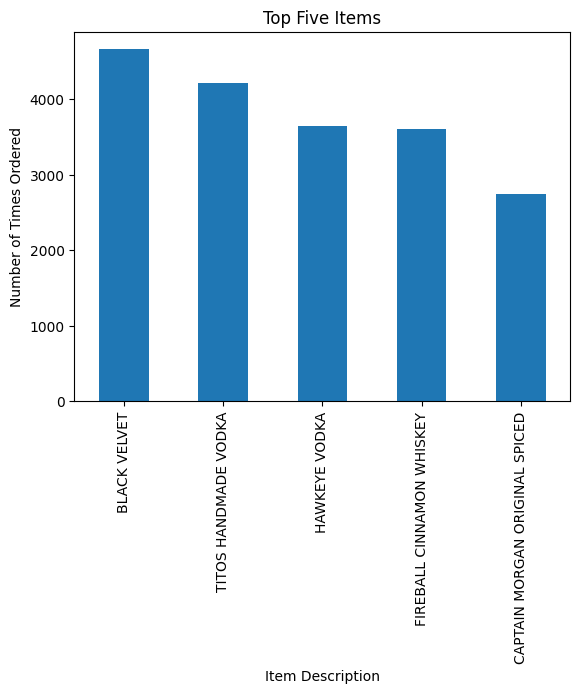

In [11]:
ax = df[f'item_description'].value_counts().head().plot(kind='bar', title = 'Top Five Items')
ax.set_xlabel('Item Description')
ax.set_ylabel('Number of Times Ordered')

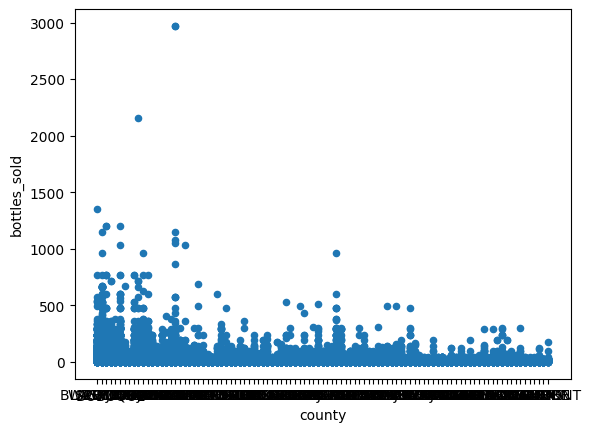

In [12]:
df.plot(kind = 'scatter', x = 'county', y = 'bottles_sold')
plt.show()

<AxesSubplot: xlabel='county', ylabel='bottles_sold'>

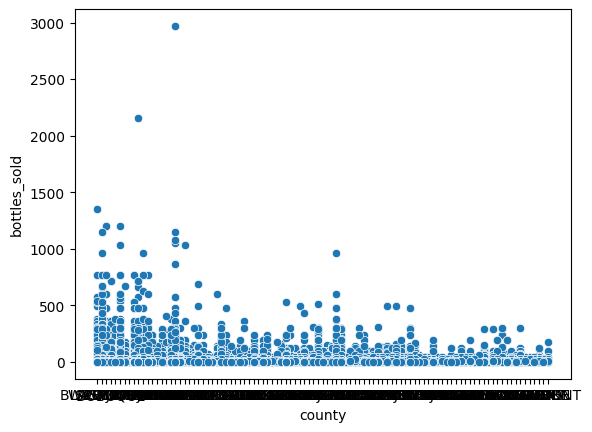

In [13]:
sns.scatterplot(x = 'county', y = 'bottles_sold', data=df)

In [14]:
sql_statement2 = """
SELECT * 
FROM
  (SELECT
      county,
      count(bottles_sold) as total_bottles_sold
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  --WHERE date >='2021-01-01' AND date <= '2021-12-31'
  WHERE date >='2021-01-01' AND date <= '2021-01-31' 
  --WHERE date = '2021-01-04'
  GROUP BY county)
WHERE total_bottles_sold > 2000
ORDER BY total_bottles_sold DESC


""".strip()
print(sql_statement2)

SELECT * 
FROM
  (SELECT
      county,
      count(bottles_sold) as total_bottles_sold
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  --WHERE date >='2021-01-01' AND date <= '2021-12-31'
  WHERE date >='2021-01-01' AND date <= '2021-01-31' 
  --WHERE date = '2021-01-04'
  GROUP BY county)
WHERE total_bottles_sold > 2000
ORDER BY total_bottles_sold DESC


In [15]:
df = pd.read_sql_query(sql_statement2, engine)

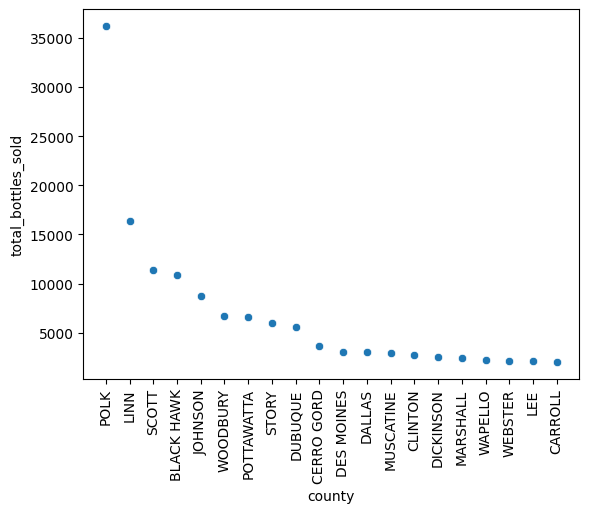

In [16]:
sns.scatterplot(x = 'county', y = 'total_bottles_sold', data=df)
plt.xticks(rotation=90)
plt.show()

In [58]:
sql_statement_categories_count= """
with source_table AS(
  SELECT
  EXTRACT(year FROM date) AS year, 
  category_name,
  item_description, volume_sold_liters
  FROM `bigquery-public-data.iowa_liquor_sales.sales`),

liquor_categories AS 
  (SELECT
  year, 
  category_name,
  item_description, 
  volume_sold_liters,
  CASE 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'WHISKEY'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'VODKA'
  WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'BRANDY'
  WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'RUM'
  WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'TEQUILA AND MEZCAL'
  WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'GIN'
  WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'LIQUEUR' 
  WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails_RTD'
  ELSE 'OTHER' END AS LIQUOR_TYPE
  FROM source_table)

SELECT  
  LIQUOR_TYPE,
  year,
sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
WHERE year BETWEEN 2018 AND 2021
GROUP BY LIQUOR_TYPE, year
ORDER BY year

""".strip()

In [59]:
df = pd.read_sql_query(sql_statement_categories_count, engine)

In [60]:
df

,LIQUOR_TYPE,year,liters_sold_per_cat
0,BRANDY,2018,1446008.65
1,TEQUILA AND MEZCAL,2018,1246700.20
2,Cocktails_RTD,2018,642846.22
3,GIN,2018,677487.97
4,LIQUEUR,2018,890937.92
5,VODKA,2018,7065473.13
6,RUM,2018,2845091.65
7,OTHER,2018,131069.96
8,WHISKEY,2018,6950366.47
9,VODKA,2019,7202653.90


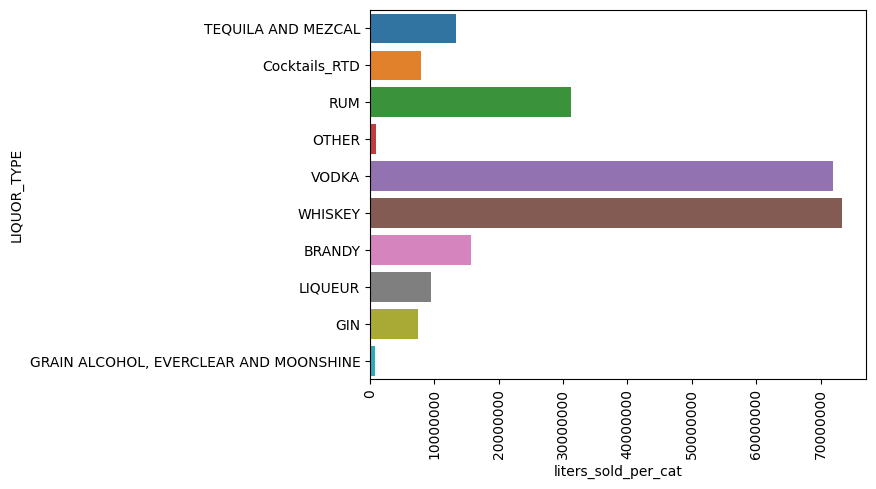

In [56]:
sns.barplot(x = 'liters_sold_per_cat', y = 'LIQUOR_TYPE', data=df)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [51]:
sql_statement_cat_by_year =""" with source_table AS(
  SELECT 
  EXTRACT (YEAR FROM date) AS year,
  category_name,
  item_description
  FROM `bigquery-public-data.iowa_liquor_sales.sales`),

liquor_categories AS 
  (SELECT
  year,
  item_description,
  CASE 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'WHISKEY'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'VODKA'
  WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'BRANDY'
  WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'RUM'
  WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'TEQUILA AND MEZCAL'
  WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'GIN'
  WHEN category_name LIKE '%GRAIN%' OR category_name LIKE '%EVERCLEAR%' OR item_description LIKE '%EVERCLEAR%' OR item_description LIKE '%MOON%' THEN 'GRAIN ALCOHOL, EVERCLEAR AND MOONSHINE'
  WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'LIQUEUR' 
  WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails_RTD'
  ELSE 'OTHER' END AS LIQUOR_TYPE
  FROM source_table)

  SELECT 
  LIQUOR_TYPE,
  year,
  count(*) AS liquor_type_order_count
  FROM liquor_categories
  WHERE year BETWEEN 2018 AND 2021
  GROUP BY 1,2
  ORDER BY 2
  """.strip()